In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

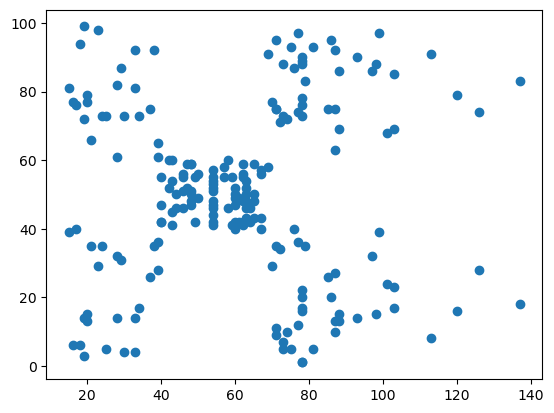

In [6]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [7]:
scaler = MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

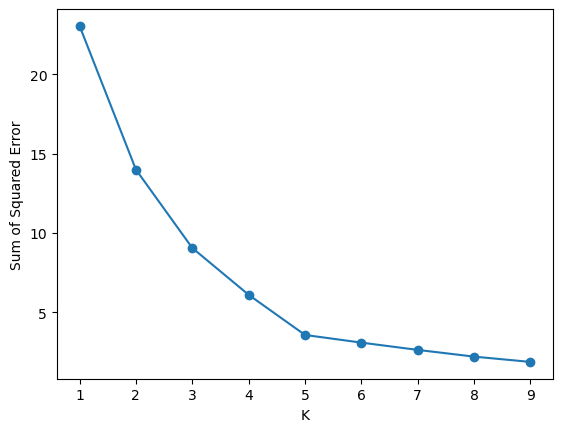

In [8]:
import warnings as wr
wr.filterwarnings('ignore')

k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)
    
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse, marker = 'o')

In [9]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [10]:
df['Cluster'] = y_pred
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,2
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,2
4,5,Female,31,0.016393,0.397959,4


In [11]:
km.cluster_centers_

array([[0.6       , 0.16443149],
       [0.33029751, 0.49508692],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432]])

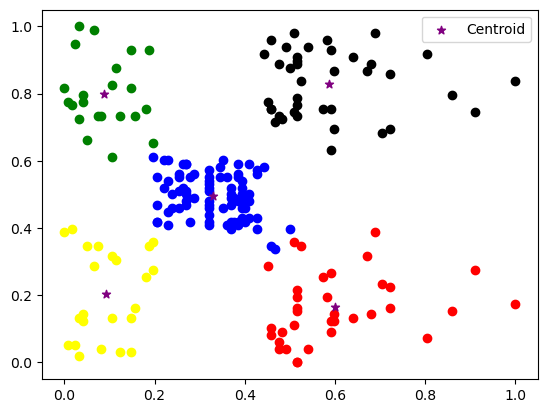

In [12]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
df5 = df[df.Cluster==4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color = 'red')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color = 'blue')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color = 'green')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color = 'black')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color = 'yellow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='Centroid')

plt.legend()